# Virtual Internship Program (VIP) by AINE AI

## By: Sourav Sarkar

# Project 7: Statistical Analysis and Hypothesis Testing

### Increasing YoY revenue from game purchases by increasing retention rate of gamers

<b>About the project:</b> The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time.

The project requires you to:
1.	Perform exploratory data analysis of the given datasets and generate their statistical summary.
2.	Perform A/B testing between the two groups of data to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.


<b>Aim:</b> Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few days. What recommendations can you suggest increasing the in-game purchase and retaining the players?

<b>Objectives/Exercise:</b>
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.

 In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,
-	group A would encounter the gate at level 30, and
-	group B would encounter the gate at level 40


## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import os

from scipy.stats import shapiro
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
df=pd.read_csv("./cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
print(df.dtypes, end="\n\n")

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
print(df.shape, end="\n\n")

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
display(df.head(5))

Data types for the data set:
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns
(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

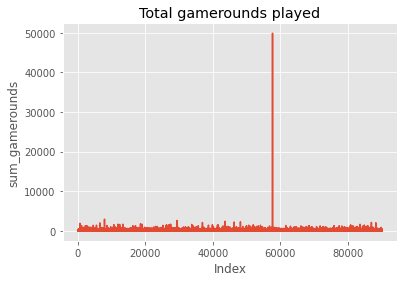

In [4]:
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df.sum_gamerounds)

In [5]:
df["sum_gamerounds"].idxmax()

57702

In [6]:
df=df.drop(df.index[57702])

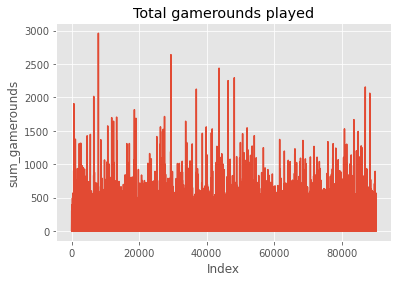

In [7]:
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [8]:
retention_rate_7=df["retention_7"].values.sum()/(df["userid"].count())*100
print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")

Overall 7 days retention rate of the game for both versions is:  18.60557945624695 %


### Q2.2 How many players never played the game after installing? 

In [9]:
never_played = df.loc[df["sum_gamerounds"]==0]
never_played["userid"].count()

3994

### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

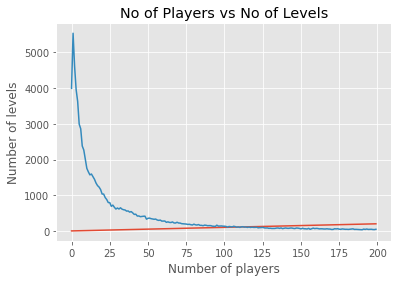

In [10]:
x = df.groupby("sum_gamerounds").userid.count().reset_index().head(200)

plt.title("No of Players vs No of Levels")
plt.xlabel("Number of players")
plt.ylabel("Number of levels")
plt.plot(x)

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [11]:
pd.crosstab(df.version, df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__
    
<b>The difference is vey minimun, but version gate_30 has a higher seven days retention rate than the version gate_40.</b>

### Q3.2 Gamerounds summary for different game versions

In [12]:
df.groupby("version").sum_gamerounds.agg(["count","mean"])

,count,mean
version,,
gate_30,44699,51.342111
gate_40,45489,51.298776


<mark>__Analsysis Results:__

<b>The total number of gamerounds played in total by each player in version gate_40 is higher that of version gate_30. But on an average version gate_30 has more gamerounds played in total by each player than in version gate_40.</b>

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [13]:
df["version"] = np.where(df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(df[df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(df[df.version=="B"]['sum_gamerounds'])

### Q4.1 Shapiro test of Normality

<b>The Shapiro-Wilks</b> test for normality is one of three general normality tests designed to detect all departures from normality.  It is comparable in power to the other two tests.

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.  Failing the normality test allows you to state with 95% confidence the data does not fit the normal distribution.  Passing the normality test only allows you to state no significant departure from normality was found.

<b>The Shapiro-Wilks</b> test is not as affected by ties as the <b>Anderson-Darling test</b>, but is still affected.  <b>The Skewness-Kurtosis All test</b> is not affected by ties and thus the default test.     

In [14]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
normality_A = shapiro(group_A)[1] < 0.05

#test for group_B
normality_B = shapiro(group_B)[1] < 0.05

In [15]:
print(normality_A)

True


In [16]:
print(normality_B)

True


<mark>__Analsysis Results:__
    
<b>We can observe that Shapiro Test of Normality for both group A and group B returns "True", i.e., their p-values are less than 0.05
Hence, NULL Hypothesis H0 is False for both groups and ALTERNATE Hypothesis H1 is True for both groups.</b>

### Q4.2 Test of homegienity of variance

<b>Levene's test</b> is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.  It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. 

Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

In [17]:
#---------------------- Levene's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
levene_test = stats.levene(list(group_A["sum_gamerounds"]),list(group_B["sum_gamerounds"]))[1] < 0.05

In [18]:
print(levene_test)

False


<mark>__Analsysis Results:__
    
<b>We can observe that Levene's Test for Variance of group A and group B returns "False",i.e., p-value is more than 0.05
Hence, both groups have equal variance. Thus,  NULL Hypothesis H0 is True and  ALTERNATE Hypothesis H1 is False.</b>

### Q4.3 Test of significance: Two sample test

<b>Mann–Whitney U test</b> (also called the <b>Mann–Whitney–Wilcoxon (MWW)</b>) is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

In [19]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
whitney_test = stats.mannwhitneyu(list(group_A["sum_gamerounds"]),list(group_B["sum_gamerounds"]))[1] < 0.05

In [20]:
print(whitney_test)

True


<mark>__Analsysis Results:__
    
<b>We can observe that Mann-Whitney U Test of group A and group B returns "True",i.e., p-value is less than 0.05
Hence, both groups are not equal. Thus, NULL Hypothesis H0 is False and ALTERNATE Hypothesis H1 is True.</b>

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [21]:
df_retention = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})

In [22]:
display(df_retention)

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
A,44699,0.448198,0.190183,2294941
B,45489,0.442283,0.182000,2333530


<mark>__Analsysis Results:__
    
<b>We can observe that group A's retention rate in both day 1 and day 7 are better than group 7. Hence, the company should not change the gate from level 30 to level 40.</b>